<a href="https://colab.research.google.com/github/suridianp/The-Classification-of-Coal-Mine-Pillar-Stability-Using-Stacking-Ensemble-Learning-Model/blob/main/Clustering(Centroids)_%2B_Elbow_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dependencies

In [ ]:
# General
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Sklearn
from sklearn import metrics

# Dataset
from google.colab import drive

# Clustering Dependencies
from sklearn.cluster import KMeans

#Dataset

###Connecting to specific folder of your Google Drive

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


###CSV File to DataFrame


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/TDS/Data/data_awal.csv")
# df = pd.read_csv("/content/gdrive/MyDrive/Machine Learning/data_awal.csv")
df

,Depth,BW,PW,MH,Ratio,Stability
0,76.20,6.10,4.88,1.37,3.562044,Failed
1,29.00,6.30,5.40,2.90,1.862069,Failed
2,60.00,6.00,7.00,1.82,3.846154,Failed
3,53.00,6.10,5.60,1.80,3.111111,Failed
4,21.00,5.25,6.75,3.20,2.109375,Failed
...,...,...,...,...,...,...
418,21.34,6.71,6.10,2.74,2.226277,Intact
419,30.48,6.40,6.40,3.66,1.748634,Intact
420,41.15,6.40,6.40,1.98,3.232323,Intact
421,78.54,6.00,14.00,2.70,5.185185,Intact


In [ ]:
df1 = df.drop(["Ratio"],axis=1)

###Correlation

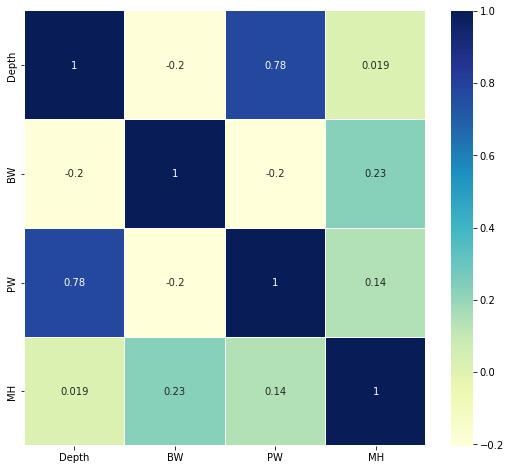

In [ ]:
# Correlation Matrix
corrmat = df1.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot = True)

Based on the chart, it can be seen that the strongest correlation is the Depth section with PW

In [ ]:
import plotly.express as px

X = df1[['Depth', 'PW']]

fig = px.scatter(df1, x='Depth', y='PW', color=df1['Stability'])
fig.show()

#K-Means Clustering

In [ ]:
# Running K-Means with a range of k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

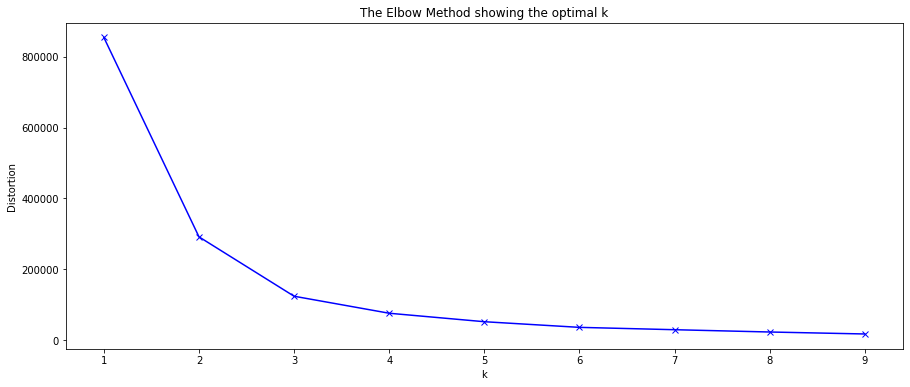

In [ ]:
# Plotting the distortions of K-Means
plt.figure(figsize=(15,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Kita dapat mengamati dari penampakan titik belok (inflection point) (**Yuan dan Yang, 2019**), bahwa "elbow" yang optimal pada kasus ini adalah angka 2. Sekarang kita dapat menjalankan K-Means dengan menggunakan n_clusters angka 2.

In [ ]:
kmeanModel = KMeans(n_clusters = 2)
kmeanModel.fit(X)

KMeans(n_clusters=2)

In [ ]:
centers = np.array(kmeanModel.cluster_centers_)

In [ ]:
df1['Cluster'] = pd.DataFrame(kmeanModel.labels_)

In [ ]:
df1

,Depth,BW,PW,MH,Stability,Cluster
0,76.20,6.10,4.88,1.37,Failed,0
1,29.00,6.30,5.40,2.90,Failed,0
2,60.00,6.00,7.00,1.82,Failed,0
3,53.00,6.10,5.60,1.80,Failed,0
4,21.00,5.25,6.75,3.20,Failed,0
...,...,...,...,...,...,...
418,21.34,6.71,6.10,2.74,Intact,0
419,30.48,6.40,6.40,3.66,Intact,0
420,41.15,6.40,6.40,1.98,Intact,0
421,78.54,6.00,14.00,2.70,Intact,0


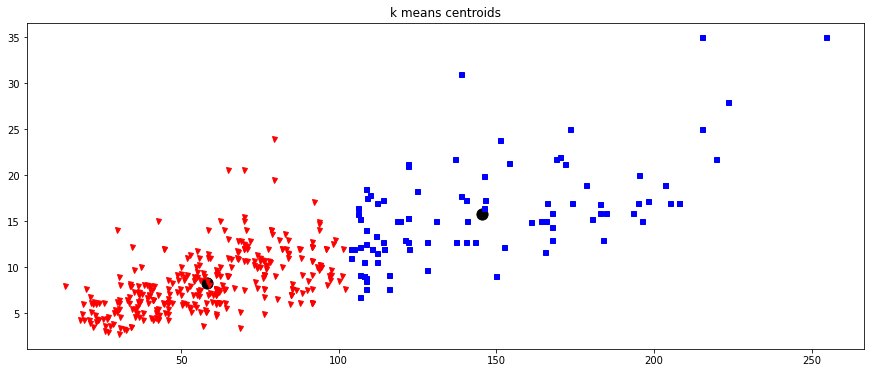

In [ ]:
colors = ['r', 'b']
markers = ['v', 's']

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)

plt.plot()
plt.title('k means centroids')

for i, l in enumerate(kmeanModel.labels_):
    plt.plot(X['Depth'].iloc[i], X['PW'].iloc[i], color=colors[l], marker=markers[l],ls='None', markersize=5)

plt.scatter(centers[:,0], centers[:,1], marker=".", color='black', s=500)
plt.show()

#Create New Label from old label with new label

In [ ]:
df1

,Depth,BW,PW,MH,Stability,Cluster
0,76.20,6.10,4.88,1.37,Failed,0
1,29.00,6.30,5.40,2.90,Failed,0
2,60.00,6.00,7.00,1.82,Failed,0
3,53.00,6.10,5.60,1.80,Failed,0
4,21.00,5.25,6.75,3.20,Failed,0
...,...,...,...,...,...,...
418,21.34,6.71,6.10,2.74,Intact,0
419,30.48,6.40,6.40,3.66,Intact,0
420,41.15,6.40,6.40,1.98,Intact,0
421,78.54,6.00,14.00,2.70,Intact,0


In [ ]:
new_label = []

l = len(df1)

for x in range(0, l):
  if df1['Stability'].iloc[x] == "Failed":
    if df1['Cluster'].iloc[x] == 0:
      new_label.append("F0")
    else:
      new_label.append("F1")
  else:
    if df1['Cluster'].iloc[x] == 0:
      new_label.append("I0")
    else:
      new_label.append("I1")

In [ ]:
df1 = df1.drop(["Stability", "Cluster"],axis=1)
df1['Cluster'] = pd.DataFrame(new_label)
df1

,Depth,BW,PW,MH,Cluster
0,76.20,6.10,4.88,1.37,F0
1,29.00,6.30,5.40,2.90,F0
2,60.00,6.00,7.00,1.82,F0
3,53.00,6.10,5.60,1.80,F0
4,21.00,5.25,6.75,3.20,F0
...,...,...,...,...,...
418,21.34,6.71,6.10,2.74,I0
419,30.48,6.40,6.40,3.66,I0
420,41.15,6.40,6.40,1.98,I0
421,78.54,6.00,14.00,2.70,I0


In [ ]:
df1.to_csv('new_clustered_data.csv', index=False)
df1.to_excel('new_clustered_data.xlsx', index=False)